In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.family'] = "Malgun Gothic"
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv("제주특별자치도 서귀포시 감귤 생산 정보_20240513.csv",encoding="cp949")

## 감귤 종류별 생산량

In [4]:
df = df[(df['연도']>=2015) & (df['연도']<=2021)]
df = df[df['구분']=='생산량']
df

,연도,읍면동,구분,노지온주(극조생),노지온주(조생),노지온주(보통),하우스감귤(조기출하),비가림(월동)감귤,만감류(시설),만감류(노지),데이터기준일
137,2015,대정읍,생산량,977.0,12275.0,0.0,0.0,1281.0,2525.0,139.1,2024-05-13
140,2015,남원읍,생산량,4134.0,126021.0,8118.0,13999.0,12677.0,21150.9,808.0,2024-05-13
143,2015,성산읍,생산량,1016.0,24097.0,710.0,16.0,1223.0,1392.0,100.0,2024-05-13
146,2015,안덕면,생산량,1507.0,19390.0,220.0,380.0,1310.0,1577.7,523.3,2024-05-13
149,2015,표선면,생산량,1045.0,26704.0,0.0,2832.0,1138.0,10631.9,220.0,2024-05-13
...,...,...,...,...,...,...,...,...,...,...,...
437,2021,서홍동,생산량,855.4,8560.7,0.0,70.0,163.4,1134.1,204.0,2024-05-13
440,2021,대륜동,생산량,1260.7,14813.7,0.0,280.0,96.7,2170.5,54.4,2024-05-13
443,2021,대천동,생산량,2731.1,18622.1,0.0,716.0,2836.4,8922.7,330.5,2024-05-13
446,2021,중문동,생산량,2482.7,21284.8,0.0,1675.0,130.7,3542.7,151.3,2024-05-13


In [5]:
df_yearly = df.groupby('연도').agg({
    '노지온주(극조생)': 'sum',
    '노지온주(조생)': 'sum',
    '노지온주(보통)': 'sum',
    '하우스감귤(조기출하)': 'sum',
    '비가림(월동)감귤': 'sum',
    '만감류(시설)': 'sum',
    '만감류(노지)': 'sum'
}).reset_index()

df_yearly

,연도,노지온주(극조생),노지온주(조생),노지온주(보통),하우스감귤(조기출하),비가림(월동)감귤,만감류(시설),만감류(노지)
0,2015,17293.0,315626.0,11592.0,19774.0,21224.0,54362.0,1936.0
1,2016,15735.0,253669.0,9485.0,20924.0,27975.0,58283.0,2098.0
2,2017,20085.0,244588.0,12735.0,22788.0,29975.0,58211.0,3210.0
3,2018,36112.0,254586.0,3401.0,21857.0,25270.0,58949.0,2403.0
4,2019,37262.0,307882.0,3368.0,26326.0,20539.0,60762.0,2184.0
5,2020,37099.0,303901.0,3439.0,24344.0,20571.0,58616.0,2532.0
6,2021,37617.4,301313.0,0.0,25277.0,19762.7,90763.5,2651.8


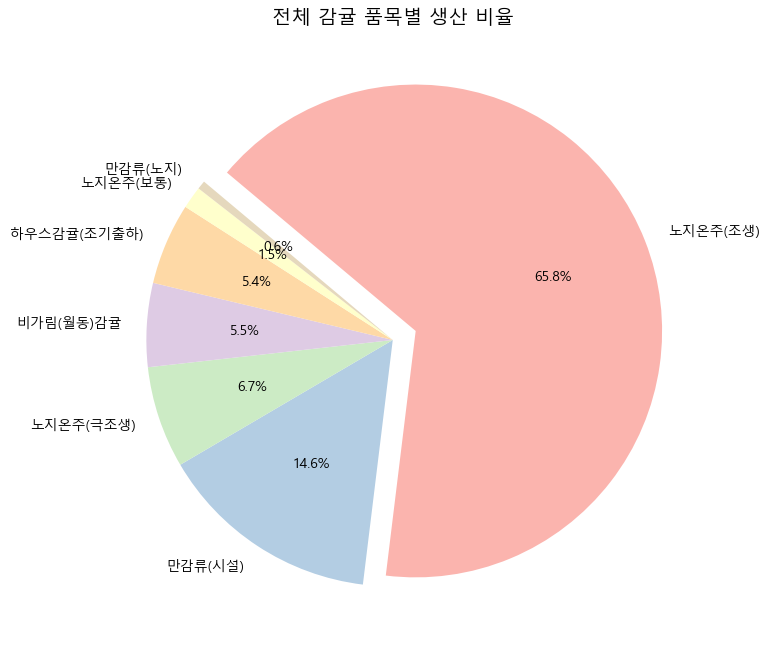

In [8]:
cols = ['노지온주(극조생)','노지온주(조생)','노지온주(보통)',
        '하우스감귤(조기출하)','비가림(월동)감귤','만감류(시설)','만감류(노지)']

totals = df[cols].sum().sort_values(ascending=False)

colors = plt.cm.Pastel1(range(len(totals)))

plt.figure(figsize=(8,8))
plt.pie(totals, labels=totals.index, autopct='%1.1f%%',
        startangle=140, counterclock=False, colors=colors, explode=explode)
plt.title("전체 감귤 품목별 생산 비율", fontsize=14)
plt.show()
